<a href="https://colab.research.google.com/github/rafaelgallonb/projetos-fada/blob/main/Tech_Challenge_02_Modelo_Preditivo_IBOVESPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Problema**

Realizar um modelo preditivo com dados do IBOVESPA (Bolsa de valores) para criar uma série temporal e prever diariamente o fechameto da base com uma acurácia mínima de 70%.



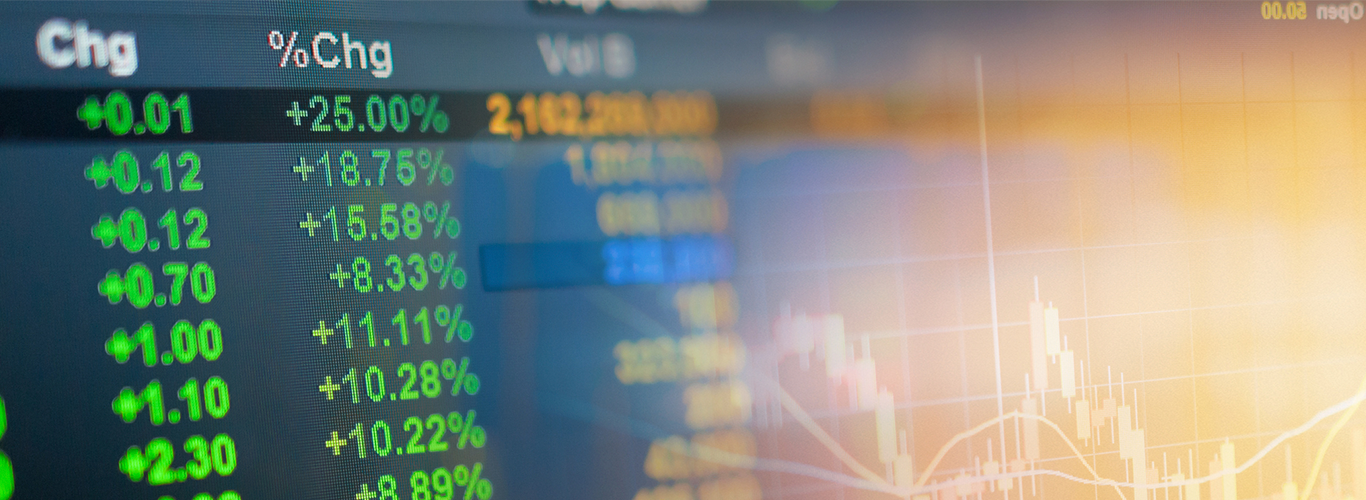

# **O que é o IBOVESPA?**

O Ibovespa é o principal indicador de desempenho das ações negociadas na B3 e reúne as empresas mais importantes do mercado de capitais brasileiro. Reavaliado a cada quatro meses, o índice é resultado de uma carteira teórica de ativos. É composto pelas ações e units de companhias listadas na B3 que atendem aos critérios descritos na sua metodologia, correspondendo a cerca de 80% do número de negócios e do volume financeiro do nosso mercado de capitais.

Os requisitos que uma empresa precisa cumprir para ser listada no índice IBOVESPA são:

*   Estar no grupo de 85% dos papeis com maior índice de negociação (relacionado à liquidez do papel) na consolidação das 3 últimas carteiras (12 meses).
*   Ter ativos negociados em 95% dos pregões nos últimos 12 meses.
*   Ter participação de no mínimo 0,1% do volume financeiro do mercado à vista nos últimos 12 meses.
*   Não ser classificada como uma penny stock (ações que tem preço unitário muito baixo)
*   Tipo de papeis elegíveis: ações ou units.


Fonte: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

# **Carteira IBOVESPA do dia 04/09/2023**

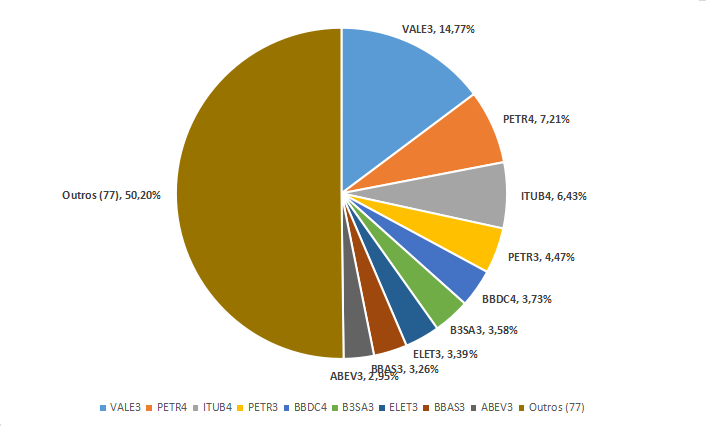

Fonte: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

# **Os Desafios**



1.   **Comportamento humano imprevisível:** O mercado de ações é influenciado diariamente por milhões de investidores individuais (pessoas físicas) e instituições (pessoas jurídicas) e cada um tomando decisões com base em informações, emoções, percepções e objetivos pessoais.
2.   **Informações assimétricas:** Informações privilegiadas ou não públicas podem afetar significativamente o preço de uma ação e consequentemente o índice.
3.   **Eventos imprevisíveis:** Eventos inesperados, como crises econômcas, desastres naturais, pandemias (Covid-19), evento geopolíticos entre outros, possuem grandes impactos sobre os mercados financeiros.
4.   **Algoritmos e negociações de alta frequência:** Automações e o uso de algoritmos de negociação de alta frequência tornam o mercado ainda mais complexo e volátil.

O mercado de ações é afetado por uma ampla variedade de fatores, incluindo indicadores econômicos, taxas de juros, políticas governamentais, relações comerciais, etc. São várias interações complexas que tornam a previsão dos preços ainda mais difícil.



# **Modelo Auto-Machine (Biblioteca PyCaret)**

In [ ]:
!pip install pycaret

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb

from pycaret.regression import *
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_log_error, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('/content/iBovespa Futures.csv', decimal=',')

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/31/2003,13.567,13.54,13.600,13.54,16.82K,0.43%
1,08/01/2003,13.177,13.23,13.230,13.16,20.86K,-2.87%
2,08/04/2003,12.990,12.94,13.020,12.92,23.71K,-1.42%
3,08/05/2003,13.101,13.07,13.125,13.03,21.36K,0.85%
4,08/06/2003,12.920,12.92,12.950,12.83,25.75K,-1.38%


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [6]:
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [7]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/07/2003,13.567,13.54,13.600,13.54,16.82K,0.43%
1,01/08/2003,13.177,13.23,13.230,13.16,20.86K,-2.87%
2,04/08/2003,12.990,12.94,13.020,12.92,23.71K,-1.42%
3,05/08/2003,13.101,13.07,13.125,13.03,21.36K,0.85%
4,06/08/2003,12.920,12.92,12.950,12.83,25.75K,-1.38%


In [8]:
df.shape

(4964, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4964 non-null   object 
 1   Price     4964 non-null   float64
 2   Open      4964 non-null   float64
 3   High      4964 non-null   float64
 4   Low       4964 non-null   float64
 5   Vol.      4917 non-null   object 
 6   Change %  4964 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.6+ KB


In [10]:
df.isna().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol.        47
Change %     0
dtype: int64

In [11]:
df = df[['Date', 'Price']]
df.columns = ['Date', 'Price']
df = df.set_index('Date')

In [12]:
df.head()

,Price
Date,
31/07/2003,13.567
01/08/2003,13.177
04/08/2003,12.990
05/08/2003,13.101
06/08/2003,12.920


In [13]:
df.tail()

,Price
Date,
25/07/2023,123.001
26/07/2023,123.582
27/07/2023,120.700
28/07/2023,120.951
31/07/2023,122.648


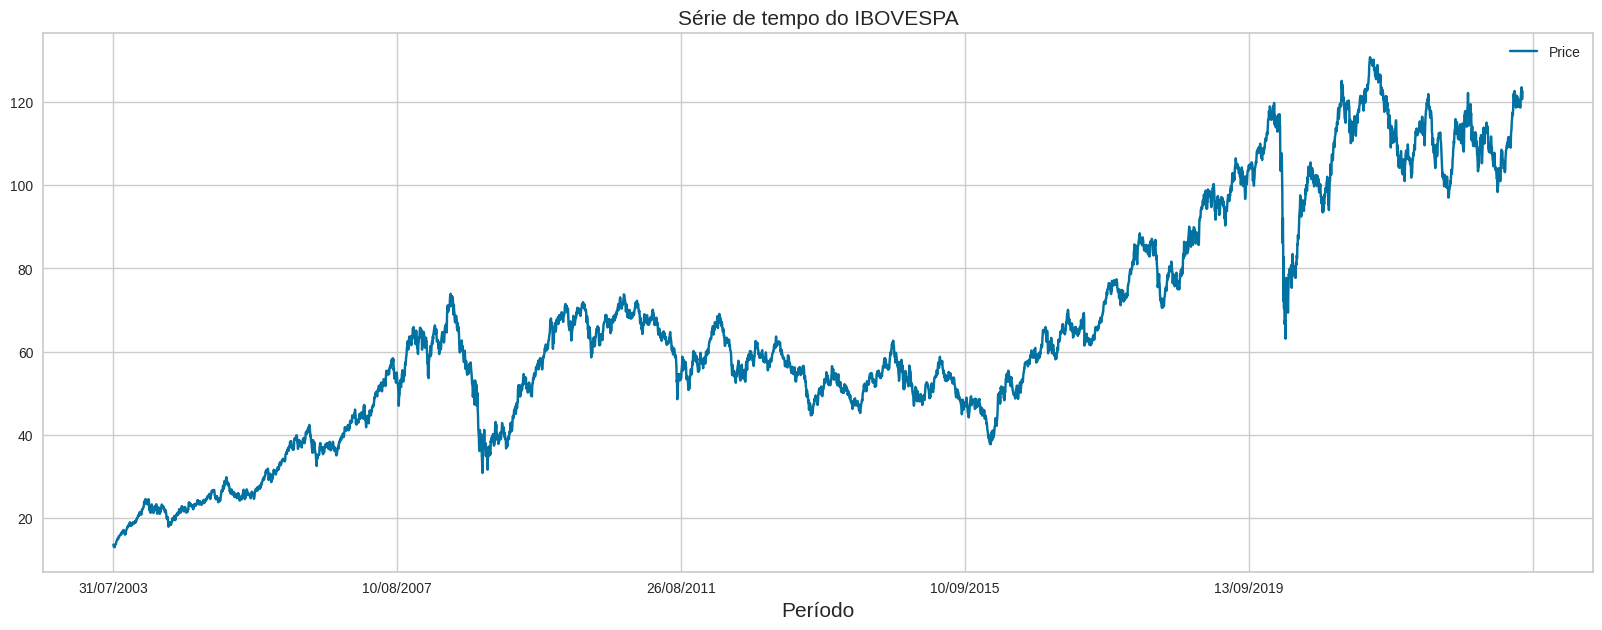

In [14]:
df.plot(figsize=(20,7))
plt.title('Série de tempo do IBOVESPA', size=15)
plt.xlabel('Período', size=15);

In [15]:
df.describe()

,Price
count,4964.000000
mean,65.037559
std,27.851629
min,12.920000
25%,47.990000
50%,59.698500
75%,81.102500
max,130.814000


In [16]:
x_data = []
y_data = []

In [17]:
for d in range(5,df.shape[0]):
    x = df.iloc[d-5:d].values.ravel()
    y = df.iloc[d].values[0]
    x_data.append(x)
    y_data.append(y)

In [18]:
y = pd.DataFrame(y_data)
X = pd.DataFrame(x_data)
X['target']=y

In [19]:
X.head()

,0,1,2,3,4,target
0,13.567,13.177,12.990,13.101,12.920,13.362
1,13.177,12.990,13.101,12.920,13.362,13.480
2,12.990,13.101,12.920,13.362,13.480,13.583
3,13.101,12.920,13.362,13.480,13.583,13.577
4,12.920,13.362,13.480,13.583,13.577,13.722


In [20]:
X.tail()

,0,1,2,3,4,target
4954,119.028,118.686,119.109,121.324,122.442,123.001
4955,118.686,119.109,121.324,122.442,123.001,123.582
4956,119.109,121.324,122.442,123.001,123.582,120.700
4957,121.324,122.442,123.001,123.582,120.700,120.951
4958,122.442,123.001,123.582,120.700,120.951,122.648


In [21]:
x_treino = X[:-1984]
x_teste = X[-1984:]

In [22]:
reg1 = setup(data=x_treino, target = 'target', fold_strategy='timeseries' ,train_size = 0.8)

,Description,Value
0,Session id,817
1,Target,target
2,Target type,Regression
3,Original data shape,"(2975, 6)"
4,Transformed data shape,"(2975, 6)"
5,Transformed train set shape,"(2380, 6)"
6,Transformed test set shape,"(595, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [23]:
best = compare_models(turbo=False, sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.6130,0.7291,0.8502,0.9969,0.0176,0.0131,0.0630
ard,Automatic Relevance Determination,0.6132,0.7302,0.8508,0.9969,0.0176,0.0131,0.0450
tr,TheilSen Regressor,0.6136,0.7327,0.8524,0.9969,0.0176,0.0131,0.8910
ransac,Random Sample Consensus,0.6144,0.7324,0.8522,0.9969,0.0176,0.0132,0.0410
lr,Linear Regression,0.6145,0.7325,0.8522,0.9969,0.0176,0.0132,0.8230
ridge,Ridge Regression,0.6146,0.7325,0.8522,0.9969,0.0176,0.0132,0.0420
br,Bayesian Ridge,0.6147,0.7325,0.8522,0.9969,0.0176,0.0132,0.0400
llar,Lasso Least Angle Regression,0.6200,0.7375,0.8552,0.9969,0.0179,0.0134,0.0390
kr,Kernel Ridge,0.6203,0.7398,0.8566,0.9969,0.0178,0.0133,0.6000
lasso,Lasso Regression,0.6217,0.7380,0.8554,0.9969,0.0179,0.0134,0.0390


Processing:   0%|          | 0/105 [00:00<?, ?it/s]

In [24]:
ard = create_model('ard')
print(ard)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6204,0.7012,0.8374,0.9969,0.0170,0.0131
1,0.5550,0.5730,0.7570,0.9974,0.0159,0.0118
2,0.6198,0.7516,0.8669,0.9970,0.0178,0.0133
3,0.6292,0.7809,0.8837,0.9970,0.0176,0.0135
4,0.5331,0.5594,0.7479,0.9974,0.0155,0.0116
5,0.6120,0.7218,0.8496,0.9972,0.0182,0.0133
6,0.7009,1.0317,1.0157,0.9960,0.0203,0.0145
7,0.5897,0.6163,0.7851,0.9972,0.0161,0.0126
8,0.6776,0.8997,0.9485,0.9961,0.0202,0.0148


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ARDRegression(n_iter=1000)


In [25]:
tune_ard = tune_model(ard)
print(tune_ard)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6150,0.6916,0.8316,0.9970,0.0168,0.0130
1,0.5586,0.5809,0.7622,0.9973,0.0161,0.0118
2,0.6203,0.7481,0.8649,0.9970,0.0177,0.0134
3,0.6296,0.7810,0.8837,0.9970,0.0175,0.0136
4,0.5340,0.5588,0.7475,0.9974,0.0156,0.0117
5,0.6117,0.7242,0.8510,0.9972,0.0182,0.0133
6,0.7017,1.0338,1.0167,0.9960,0.0204,0.0145
7,0.5862,0.6184,0.7864,0.9972,0.0161,0.0124
8,0.6818,0.8990,0.9482,0.9961,0.0204,0.0151


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
ARDRegression(n_iter=1000)


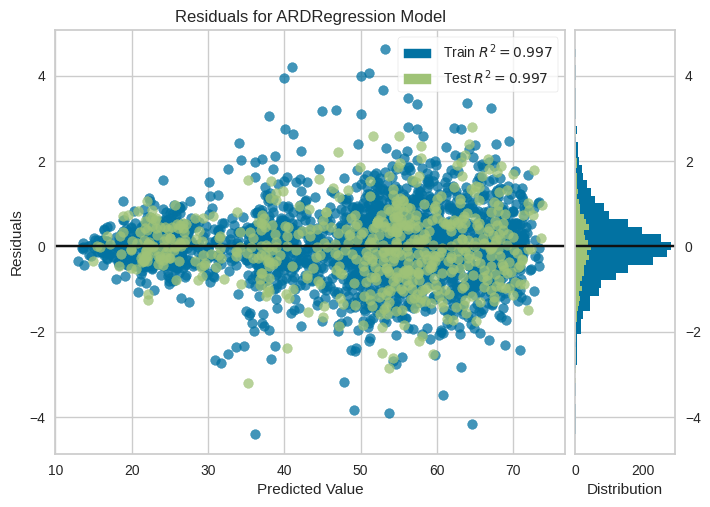

In [26]:
plot_model(ard)

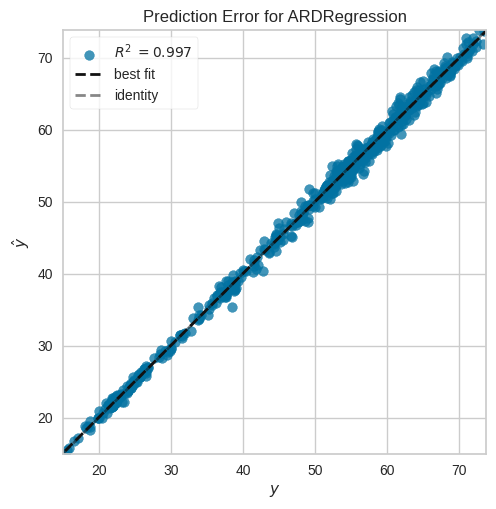

In [27]:
plot_model(ard, plot='error')

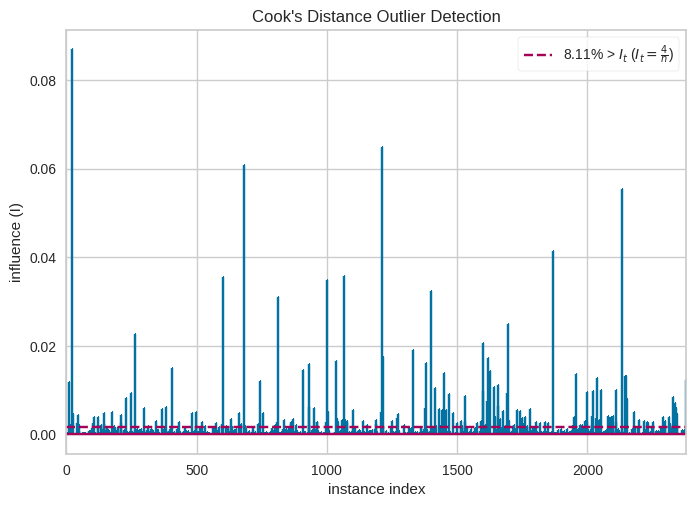

In [28]:
plot_model(ard, plot='cooks')

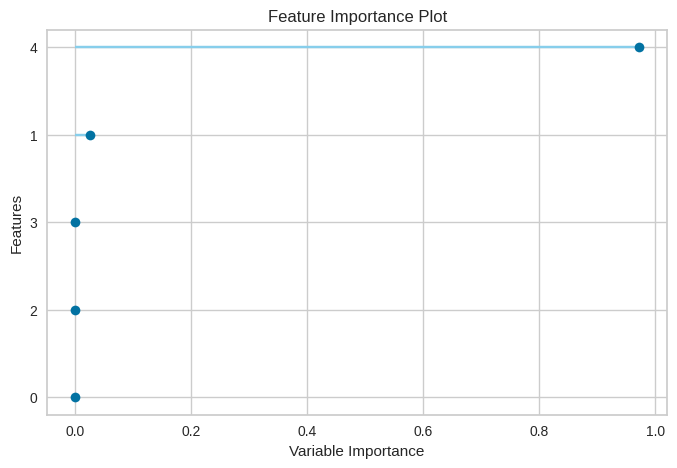

In [29]:
plot_model(ard, plot='feature')

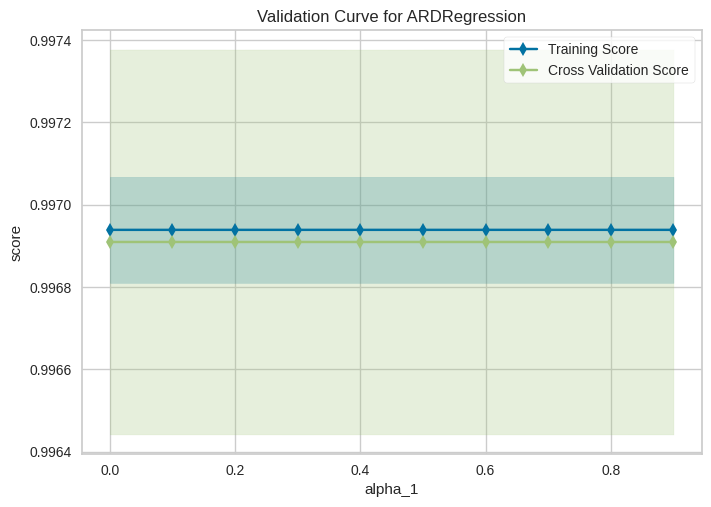

In [30]:
plot_model(ard, plot='vc')

In [31]:
plot_model(ard, plot='parameter')

,Parameters
alpha_1,1e-06
alpha_2,1e-06
compute_score,False
copy_X,True
fit_intercept,True
lambda_1,1e-06
lambda_2,1e-06
n_iter,1000
threshold_lambda,10000.0
tol,0.001


In [32]:
predict_model(ard)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Automatic Relevance Determination,0.6509,0.7295,0.8541,0.9969,0.0172,0.0136


,0,1,2,3,4,target,prediction_label
55,18.341000,18.221001,18.757999,18.917999,18.732000,18.079000,18.798637
2326,60.998001,61.485001,61.761002,61.337002,61.383999,60.828999,61.365047
2319,58.526001,59.188999,59.549000,59.589001,59.741001,60.053001,59.709305
2944,54.710999,54.605999,54.637001,53.931999,54.766998,53.735001,54.757069
2631,45.377998,46.439999,46.860001,47.466999,47.643002,48.278000,47.623413
...,...,...,...,...,...,...,...
138,22.070000,22.200001,22.200001,21.150000,21.556999,21.936001,21.646345
903,45.555000,45.726002,45.816002,45.443001,44.644001,45.567001,44.689762
913,46.632000,46.980999,47.183998,46.847000,47.290001,47.919998,47.294037
2227,54.269001,56.860001,57.544998,56.173000,56.509998,55.599998,56.508957


In [33]:
final_ard = finalize_model(ard)
print(final_ard)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['0', '1', '2', '3', '4'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator', ARDRegression(n_iter=1000))])


In [34]:
predict_model(final_ard);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Automatic Relevance Determination,0.6505,0.7290,0.8538,0.9969,0.0172,0.0136


In [35]:
predicoes = predict_model(final_ard, data=x_teste)
predicoes.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Automatic Relevance Determination,1.0137,2.0816,1.4428,0.9964,0.0166,0.0116


,0,1,2,3,4,target,prediction_label
2975,50.341000,50.023998,48.583000,49.355000,49.097000,48.433998,49.136669
2976,50.023998,48.583000,49.355000,49.097000,48.433998,48.793999,48.452309
2977,48.583000,49.355000,49.097000,48.433998,48.793999,48.342999,48.823601
2978,49.355000,49.097000,48.433998,48.793999,48.342999,48.049999,48.379383
2979,49.097000,48.433998,48.793999,48.342999,48.049999,48.231998,48.076172


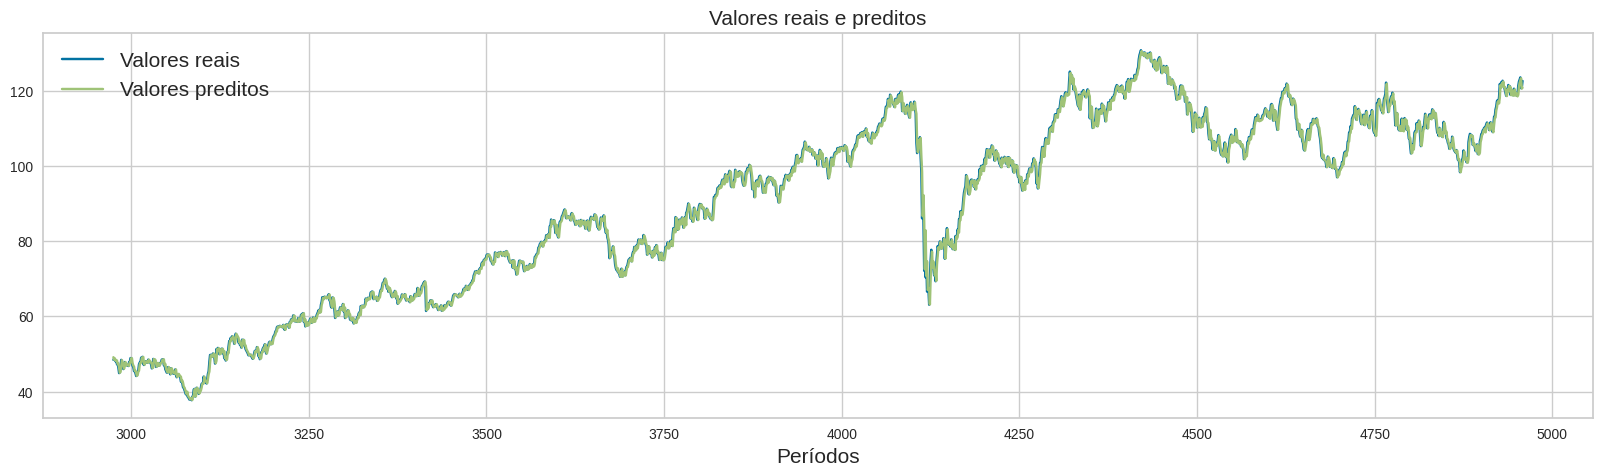

In [36]:
predicoes['target'].plot(figsize=(20,5))
predicoes['prediction_label'].plot()
plt.legend(['Valores reais','Valores preditos'], fontsize=15)
plt.xlabel('Períodos',size=15)
plt.title('Valores reais e preditos',size=15);
#x_treino['target'].plot();

In [37]:
print('Coeficiente de determinação :',r2_score(predicoes['prediction_label'],predicoes['target']))
print('Erro absoluto mediano :',median_absolute_error(predicoes['prediction_label'],predicoes['target']))
print('Erro absoluto logatítmico médio :',mean_squared_log_error(predicoes['prediction_label'],predicoes['target']))
print('Erro quadrado médio :',mean_squared_error(predicoes['prediction_label'],predicoes['target']))
print('Erro absoluto mediano :',mean_absolute_error(predicoes['prediction_label'],predicoes['target']))

Coeficiente de determinação : 0.9963872580490327
Erro absoluto mediano : 0.7549362
Erro absoluto logatítmico médio : 0.00027508516
Erro quadrado médio : 2.0815725
Erro absoluto mediano : 1.0136613


# **Modelo LSTM**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/content/iBovespa Futures.csv', decimal=',')

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [41]:
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [42]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/07/2003,13.567,13.54,13.600,13.54,16.82K,0.43%
1,01/08/2003,13.177,13.23,13.230,13.16,20.86K,-2.87%
2,04/08/2003,12.990,12.94,13.020,12.92,23.71K,-1.42%
3,05/08/2003,13.101,13.07,13.125,13.03,21.36K,0.85%
4,06/08/2003,12.920,12.92,12.950,12.83,25.75K,-1.38%


In [43]:
df.set_index('Date', inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4964 entries, 31/07/2003 to 31/07/2023
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4964 non-null   float64
 1   Open      4964 non-null   float64
 2   High      4964 non-null   float64
 3   Low       4964 non-null   float64
 4   Vol.      4917 non-null   object 
 5   Change %  4964 non-null   object 
dtypes: float64(4), object(2)
memory usage: 271.5+ KB


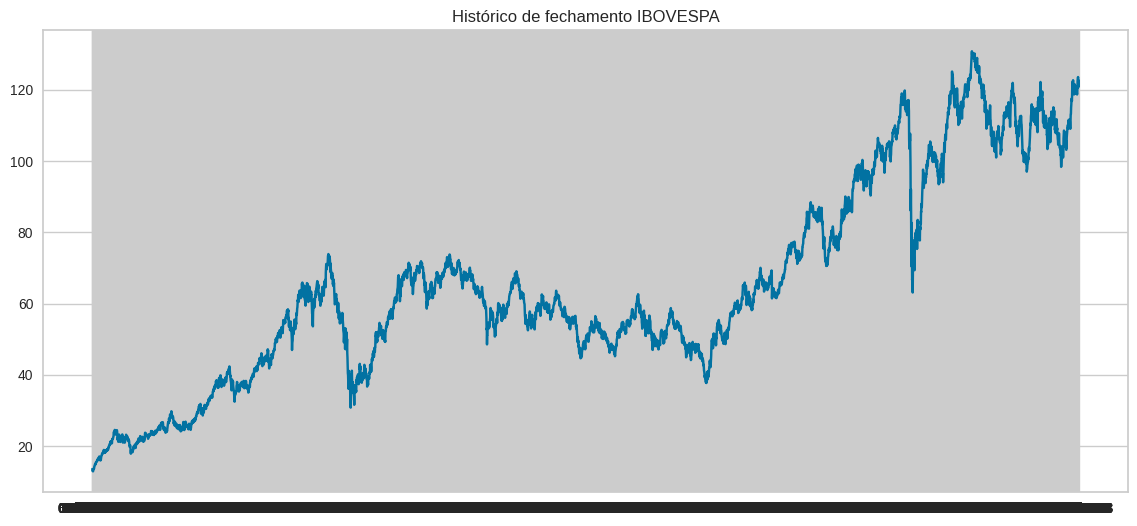

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.title('Histórico de fechamento IBOVESPA')
plt.plot(df['Price'])
plt.show()

In [46]:
cotacoes_df = df.filter(['Price'])
cotacoes = cotacoes_df.values

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler(feature_range=(0, 1))
cotacoes_normalizadas = normalizador.fit_transform(cotacoes)

In [47]:
from math import ceil

dias_treinamento = ceil( len(cotacoes) *.8)
cotacoes_treinamento = cotacoes_normalizadas[0:dias_treinamento]

x_treino=[]
y_treino = []

for i in range(30,len(cotacoes_treinamento)):
    x_treino.append(cotacoes_treinamento[i-30:i])
    y_treino.append(cotacoes_treinamento[i])


import numpy as np

x_treino, y_treino = np.array(x_treino), np.array(y_treino)

x_treino = np.reshape(x_treino, (len(x_treino),30,1))

In [48]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(30,1)))
model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
model.fit(x_treino, y_treino, batch_size=1, epochs=1)

3942/3942 [==============================] - 91s 22ms/step - loss: 6.2789e-04


In [50]:
cotacoes_teste = cotacoes_normalizadas[dias_treinamento - 30:]

x_teste = []
y_teste =  cotacoes[dias_treinamento:]
for i in range(30,len(cotacoes_teste)):
    x_teste.append(cotacoes_teste[i-30:i])


x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (len(x_teste),30,1))

In [51]:
predictions = model.predict(x_teste)

predictions = normalizador.inverse_transform(predictions)

31/31 [==============================] - 2s 14ms/step


In [52]:
rmse=np.sqrt(np.mean(((predictions- y_teste)**2)))
rmse

3.7633176116435627

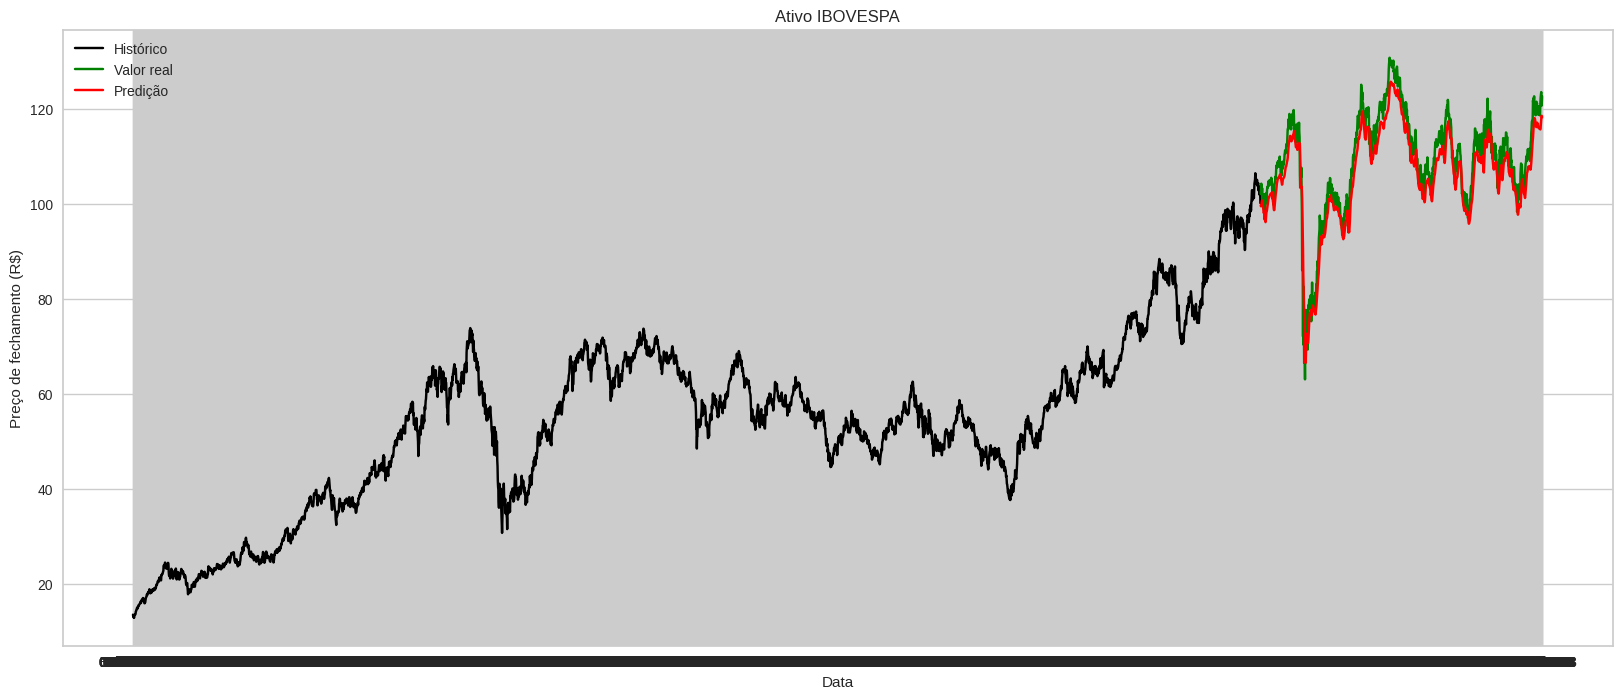

In [53]:
treino = cotacoes_df[:dias_treinamento]
valido = cotacoes_df[dias_treinamento:]
valido['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Ativo IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (R$)')
plt.plot(treino['Price'], color = 'black')
plt.plot(valido['Price'], color = 'green')
plt.plot(valido['Predictions'], color = 'red')
plt.legend(['Histórico', 'Valor real', 'Predição'])
plt.show()

In [54]:
dados_do_ativo = df

x = dados_do_ativo.filter(['Price'])
x = normalizador.fit_transform(x)
x = np.array(x)[:-2]
x = np.reshape(x, (1,4962,1))

prediction = model.predict(x)

prediction = normalizador.inverse_transform(prediction)
real = dados_do_ativo.filter(['Price']).values[-1]

print('predição: ',prediction)
print('real: ',real)

1/1 [==============================] - 1s 1s/step
predição:  [[118.58679]]
real:  [122.648]


# **Modelo Prophet**

In [55]:
!pip install prophet

In [56]:
from prophet import Prophet

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [59]:
df = pd.read_csv('/content/iBovespa Futures.csv', decimal=',')

In [60]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07/31/2003,13.567,13.54,13.600,13.54,16.82K,0.43%
1,08/01/2003,13.177,13.23,13.230,13.16,20.86K,-2.87%
2,08/04/2003,12.990,12.94,13.020,12.92,23.71K,-1.42%
3,08/05/2003,13.101,13.07,13.125,13.03,21.36K,0.85%
4,08/06/2003,12.920,12.92,12.950,12.83,25.75K,-1.38%


In [61]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [62]:
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [63]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/07/2003,13.567,13.54,13.600,13.54,16.82K,0.43%
1,01/08/2003,13.177,13.23,13.230,13.16,20.86K,-2.87%
2,04/08/2003,12.990,12.94,13.020,12.92,23.71K,-1.42%
3,05/08/2003,13.101,13.07,13.125,13.03,21.36K,0.85%
4,06/08/2003,12.920,12.92,12.950,12.83,25.75K,-1.38%


In [64]:
df = df[['Date', 'Price']]
df.columns = ['Date', 'Price']
df = df.set_index('Date')

In [65]:
df.head()

,Price
Date,
31/07/2003,13.567
01/08/2003,13.177
04/08/2003,12.990
05/08/2003,13.101
06/08/2003,12.920


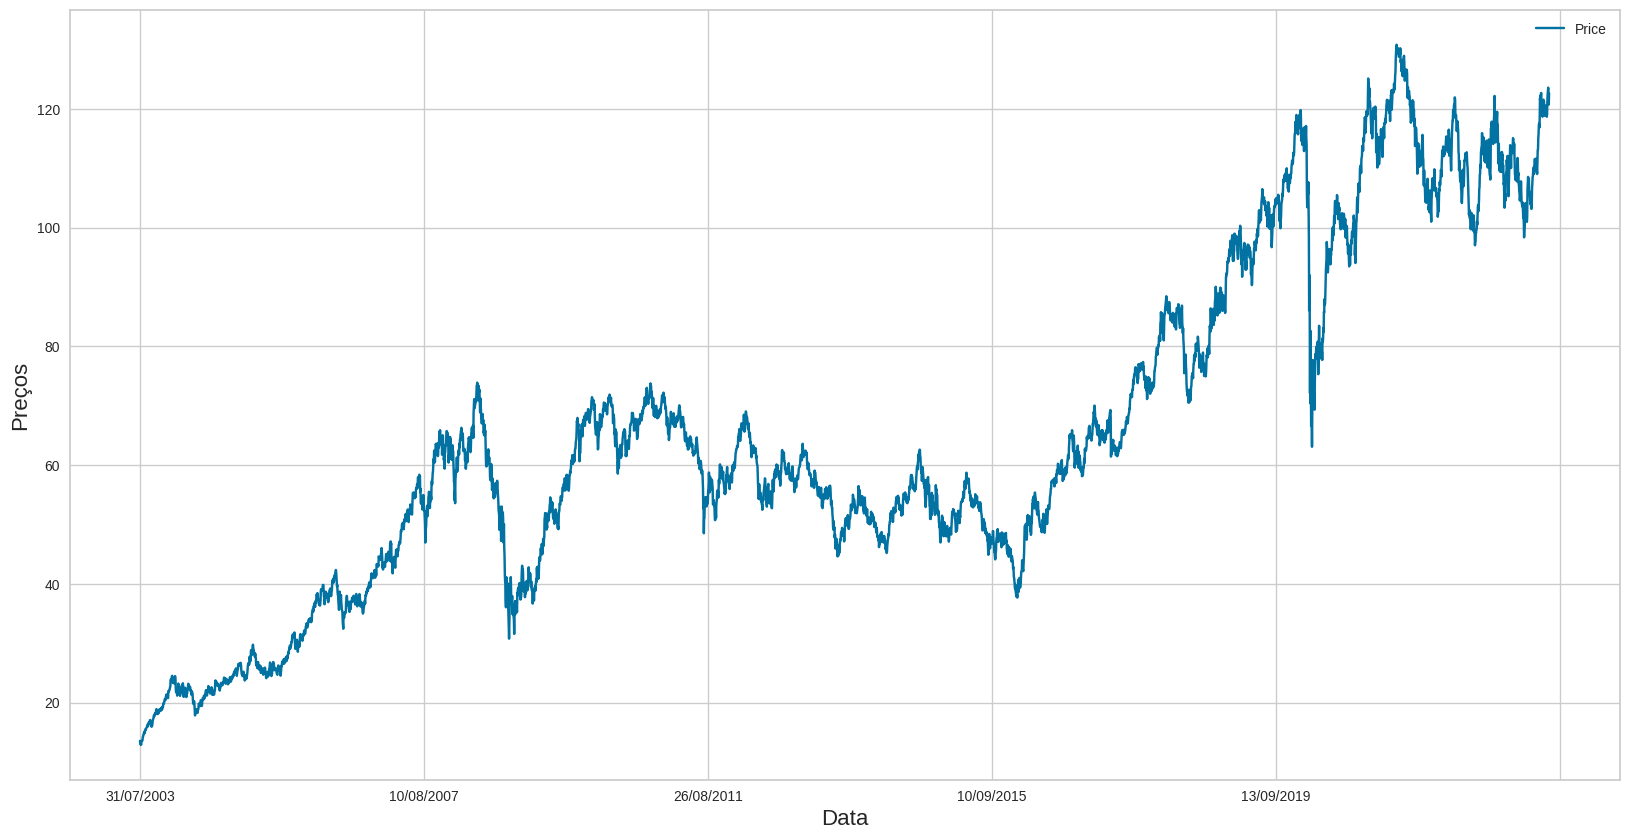

In [66]:
df.plot()
plt.xlabel('Data', size = 16)
plt.ylabel('Preços', size = 16)
plt.show()

In [ ]:
df.reset_index('Date', inplace=True)

In [72]:
df

,Date,Price
0,31/07/2003,13.567
1,01/08/2003,13.177
2,04/08/2003,12.990
3,05/08/2003,13.101
4,06/08/2003,12.920
...,...,...
4959,25/07/2023,123.001
4960,26/07/2023,123.582
4961,27/07/2023,120.700
4962,28/07/2023,120.951


In [74]:
df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')

In [73]:
df.columns = ['ds', 'y']

In [76]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [77]:
# Modelo Preditivo

model = Prophet()

model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr50ptvto/cpynfz4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr50ptvto/ncnr7p_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6891', 'data', 'file=/tmp/tmpr50ptvto/cpynfz4w.json', 'init=/tmp/tmpr50ptvto/ncnr7p_x.json', 'output', 'file=/tmp/tmpr50ptvto/prophet_modelw0uwzalt/prophet_model-20230905024656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:46:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:46:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [78]:
data_futuro = pd.date_range(start='2023-08-01', end='2023-08-31')

In [79]:
data_futuro

DatetimeIndex(['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04',
               '2023-08-05', '2023-08-06', '2023-08-07', '2023-08-08',
               '2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
               '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16',
               '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20',
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', freq='D')

In [80]:
d = pd.DataFrame(data_futuro)

In [81]:
d.columns = ['ds']

In [82]:
previsao = model.predict(d)

In [83]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-08-01,115.081366,107.586607,123.044436,115.081366,115.081366,0.259197,0.259197,0.259197,0.498229,0.498229,0.498229,-0.239032,-0.239032,-0.239032,0.0,0.0,0.0,115.340562
1,2023-08-02,115.090959,107.428395,123.332741,115.090959,115.090959,0.221798,0.221798,0.221798,0.517592,0.517592,0.517592,-0.295794,-0.295794,-0.295794,0.0,0.0,0.0,115.312757
2,2023-08-03,115.100552,107.272211,122.605485,115.100552,115.100552,0.228567,0.228567,0.228567,0.584126,0.584126,0.584126,-0.355559,-0.355559,-0.355559,0.0,0.0,0.0,115.329119
3,2023-08-04,115.110145,107.625814,123.695952,115.110145,115.110145,0.153732,0.153732,0.153732,0.570774,0.570774,0.570774,-0.417042,-0.417042,-0.417042,0.0,0.0,0.0,115.263877
4,2023-08-05,115.119739,105.399497,121.252703,115.119739,115.119739,-1.772455,-1.772455,-1.772455,-1.293524,-1.293524,-1.293524,-0.478931,-0.478931,-0.478931,0.0,0.0,0.0,113.347284
5,2023-08-06,115.129332,104.883871,120.798104,115.129332,115.129332,-1.944093,-1.944093,-1.944093,-1.404174,-1.404174,-1.404174,-0.539919,-0.539919,-0.539919,0.0,0.0,0.0,113.185239
6,2023-08-07,115.138925,107.001633,122.759927,115.138925,115.138925,-0.071755,-0.071755,-0.071755,0.526977,0.526977,0.526977,-0.598732,-0.598732,-0.598732,0.0,0.0,0.0,115.067170
7,2023-08-08,115.148518,106.560923,122.588671,115.148518,115.148518,-0.155930,-0.155930,-0.155930,0.498229,0.498229,0.498229,-0.654158,-0.654158,-0.654158,0.0,0.0,0.0,114.992589
8,2023-08-09,115.158112,106.788811,122.442528,115.158112,115.158112,-0.187481,-0.187481,-0.187481,0.517592,0.517592,0.517592,-0.705072,-0.705072,-0.705072,0.0,0.0,0.0,114.970631
9,2023-08-10,115.167705,106.918739,122.346951,115.167705,115.167705,-0.166335,-0.166335,-0.166335,0.584126,0.584126,0.584126,-0.750461,-0.750461,-0.750461,0.0,0.0,0.0,115.001370


In [84]:
previsao[ ['ds', 'yhat', 'yhat_lower', 'yhat_upper'] ]

,ds,yhat,yhat_lower,yhat_upper
0,2023-08-01,115.340562,107.586607,123.044436
1,2023-08-02,115.312757,107.428395,123.332741
2,2023-08-03,115.329119,107.272211,122.605485
3,2023-08-04,115.263877,107.625814,123.695952
4,2023-08-05,113.347284,105.399497,121.252703
5,2023-08-06,113.185239,104.883871,120.798104
6,2023-08-07,115.067170,107.001633,122.759927
7,2023-08-08,114.992589,106.560923,122.588671
8,2023-08-09,114.970631,106.788811,122.442528
9,2023-08-10,115.001370,106.918739,122.346951


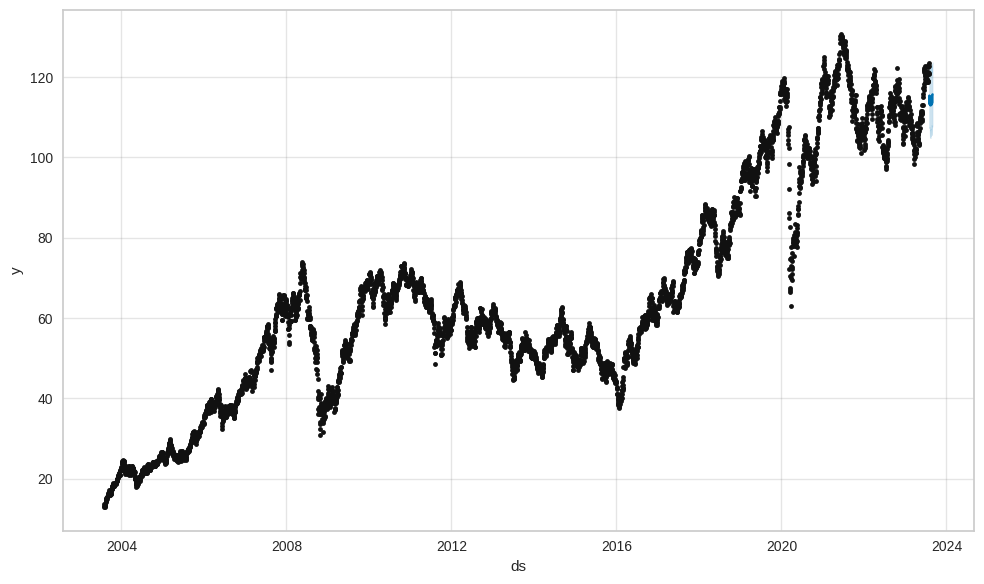

In [85]:
model.plot(previsao)
plt.show()

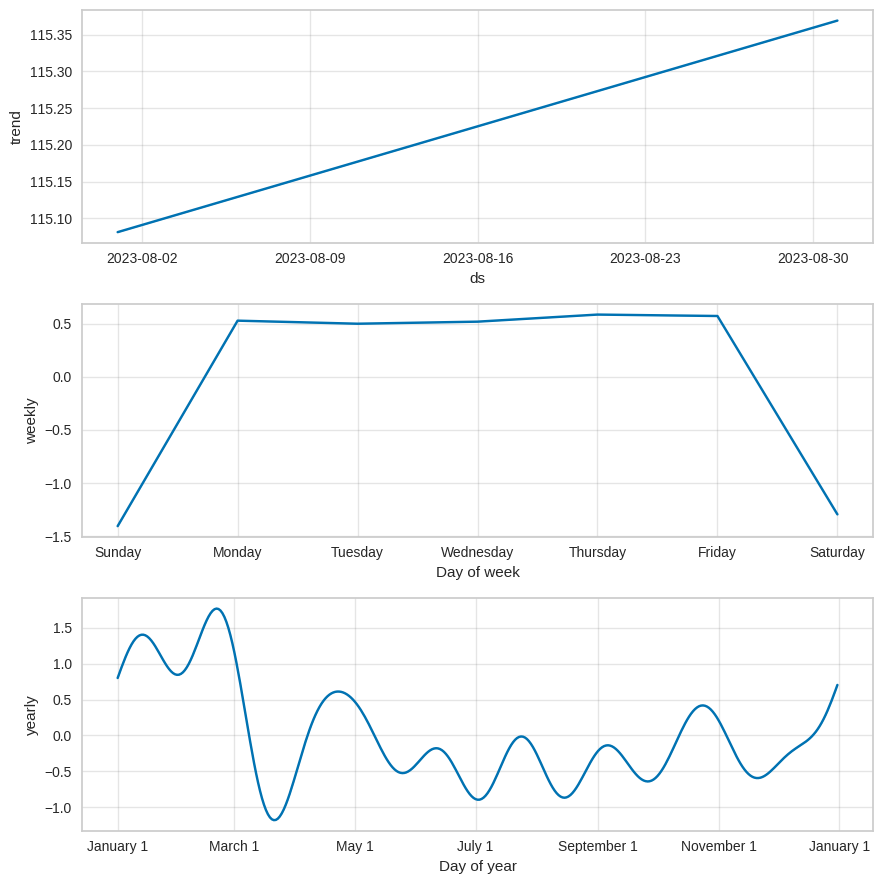

In [86]:
model.plot_components(previsao)
plt.show()

In [87]:
from prophet.plot import plot_plotly, plot_components_plotly

In [88]:
plot_plotly(model, previsao)

In [89]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [90]:
df

,ds,y
0,2003-07-31,13.567
1,2003-08-01,13.177
2,2003-08-04,12.990
3,2003-08-05,13.101
4,2003-08-06,12.920
...,...,...
4959,2023-07-25,123.001
4960,2023-07-26,123.582
4961,2023-07-27,120.700
4962,2023-07-28,120.951


In [91]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False)

In [92]:
modelo2 = Prophet()

In [93]:
modelo2.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr50ptvto/dge95f7z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr50ptvto/mxg_ox48.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11087', 'data', 'file=/tmp/tmpr50ptvto/dge95f7z.json', 'init=/tmp/tmpr50ptvto/mxg_ox48.json', 'output', 'file=/tmp/tmpr50ptvto/prophet_modelcau3b0am/prophet_model-20230905024724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [94]:
previsao2 = modelo2.predict( pd.DataFrame(df_test['ds']) )

In [95]:
y_prev = previsao2['yhat'].values
y_true = df_test['y'].values

In [96]:
mean_squared_error(y_true, y_prev)

784.4924253296728

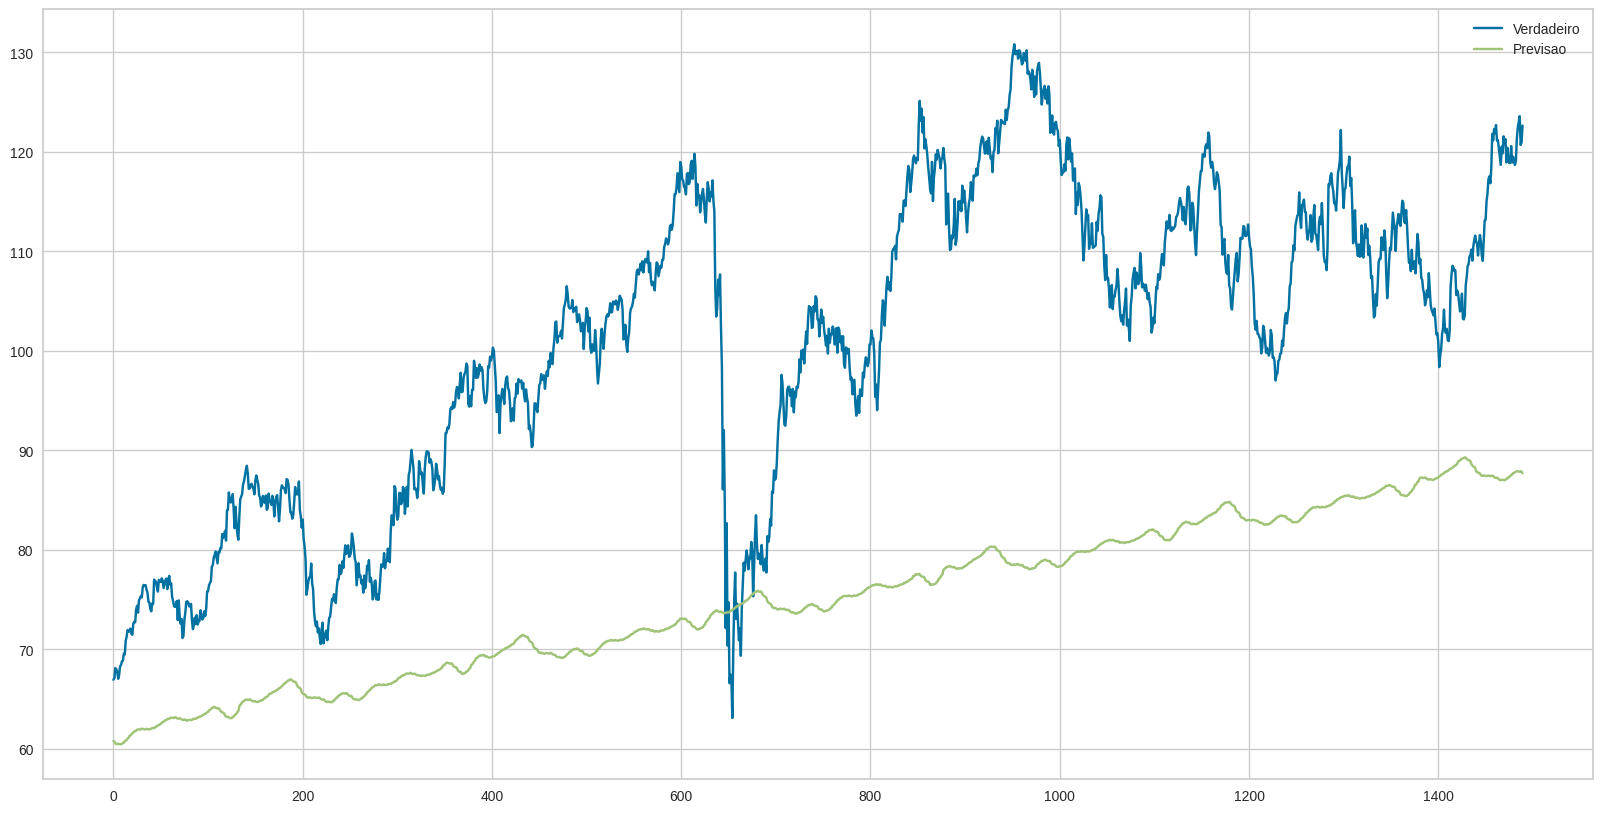

In [97]:
plt.plot(y_true, label='Verdadeiro')
plt.plot(y_prev, label='Previsao')
plt.legend()

# **Modelo ARIMA**

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_log_error, mean_squared_error, mean_absolute_error

In [99]:
df_ibov = pd.read_csv('/content/iBovespa Futures.csv', decimal=',')

In [100]:
df_ibov['Date'] = pd.to_datetime(df_ibov['Date'], format='%m/%d/%Y')

In [101]:
df_ibov['Date'] = df_ibov['Date'].dt.strftime('%d/%m/%Y')

In [102]:
df_ibov = df_ibov[['Date', 'Price']]
df_ibov.columns = ['Date', 'Price']
df_ibov = df_ibov.set_index('Date')

In [103]:
df_ibov.head

<bound method NDFrame.head of               Price
Date               
31/07/2003   13.567
01/08/2003   13.177
04/08/2003   12.990
05/08/2003   13.101
06/08/2003   12.920
...             ...
25/07/2023  123.001
26/07/2023  123.582
27/07/2023  120.700
28/07/2023  120.951
31/07/2023  122.648

[4964 rows x 1 columns]>

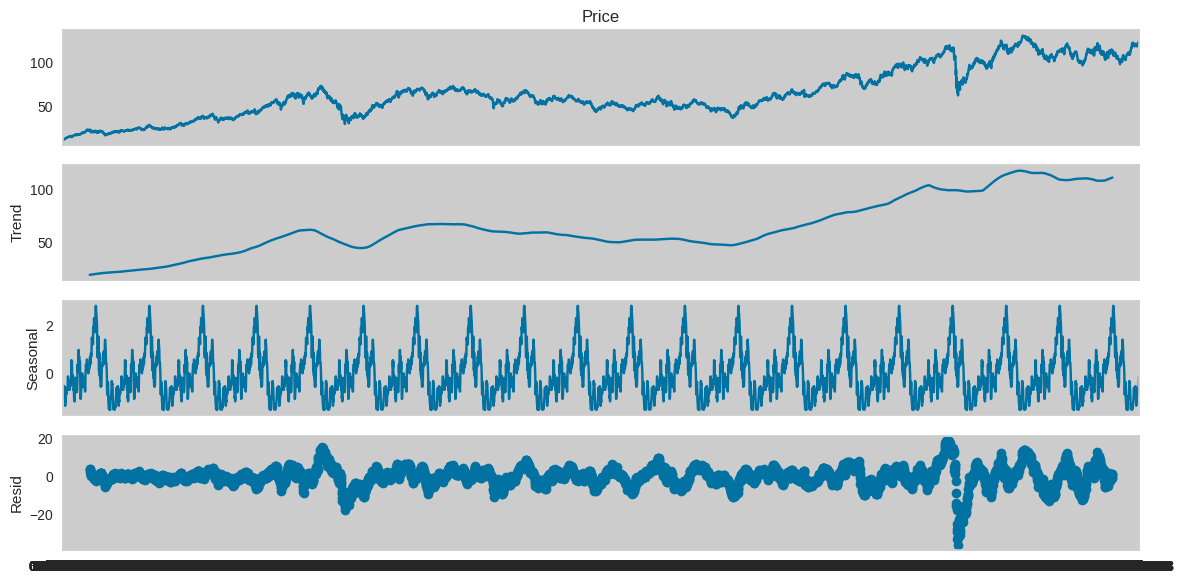

In [104]:
decomposicao_ibov = seasonal_decompose(df_ibov['Price'],
model='additive', period=247)
fig = decomposicao_ibov.plot()
fig.set_size_inches((12, 6))
fig.tight_layout()
plt.show()

In [105]:
adfuller_df = adfuller(df_ibov['Price'])
print('ADF Statistics IBOV:', adfuller_df[0])
print('p-value IBOV:', adfuller_df[1])

ADF Statistics IBOV: -1.3013039835417346
p-value IBOV: 0.6285755286591619


In [106]:
df_ibov['media_movel'] = df_ibov['Price'].rolling(200).mean()

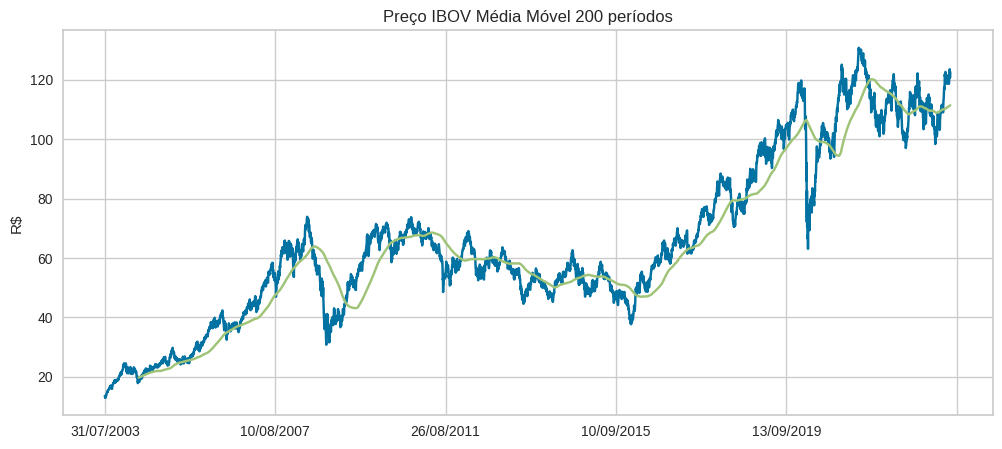

In [107]:
df_ibov['Price'].plot(figsize=(12,5))
df_ibov['media_movel'].plot()
plt.title('Preço IBOV Média Móvel 200 períodos')
plt.xlabel('')
plt.ylabel('R$')
plt.tick_params(rotation = 0)

In [108]:
df_ibov['return_percent'] = df_ibov['Price'].pct_change()
df_ibov.dropna(inplace=True)

Text(0.5, 1.0, 'Distribuição dos retornos (1º Diferenciação)')

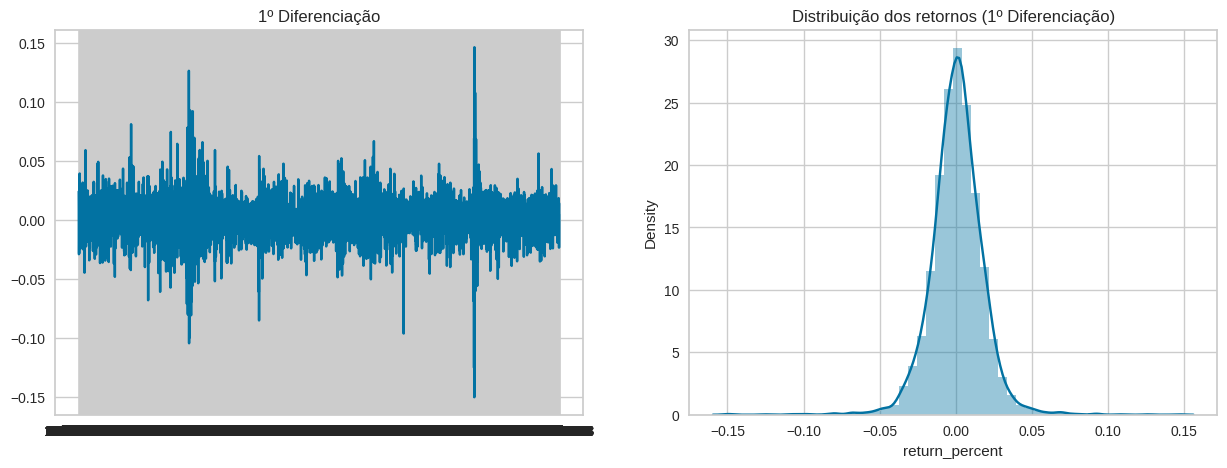

In [109]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(df_ibov['return_percent'])
axs[0].set_title('1º Diferenciação')

ax2 = sns.distplot(df_ibov['return_percent'],
                   kde=True,
                   ax=axs[1])
ax2.set_title('Distribuição dos retornos (1º Diferenciação)')

Text(0.5, 1.0, 'Distribuição da amostra comparado com teórico')

<Figure size 800x400 with 0 Axes>

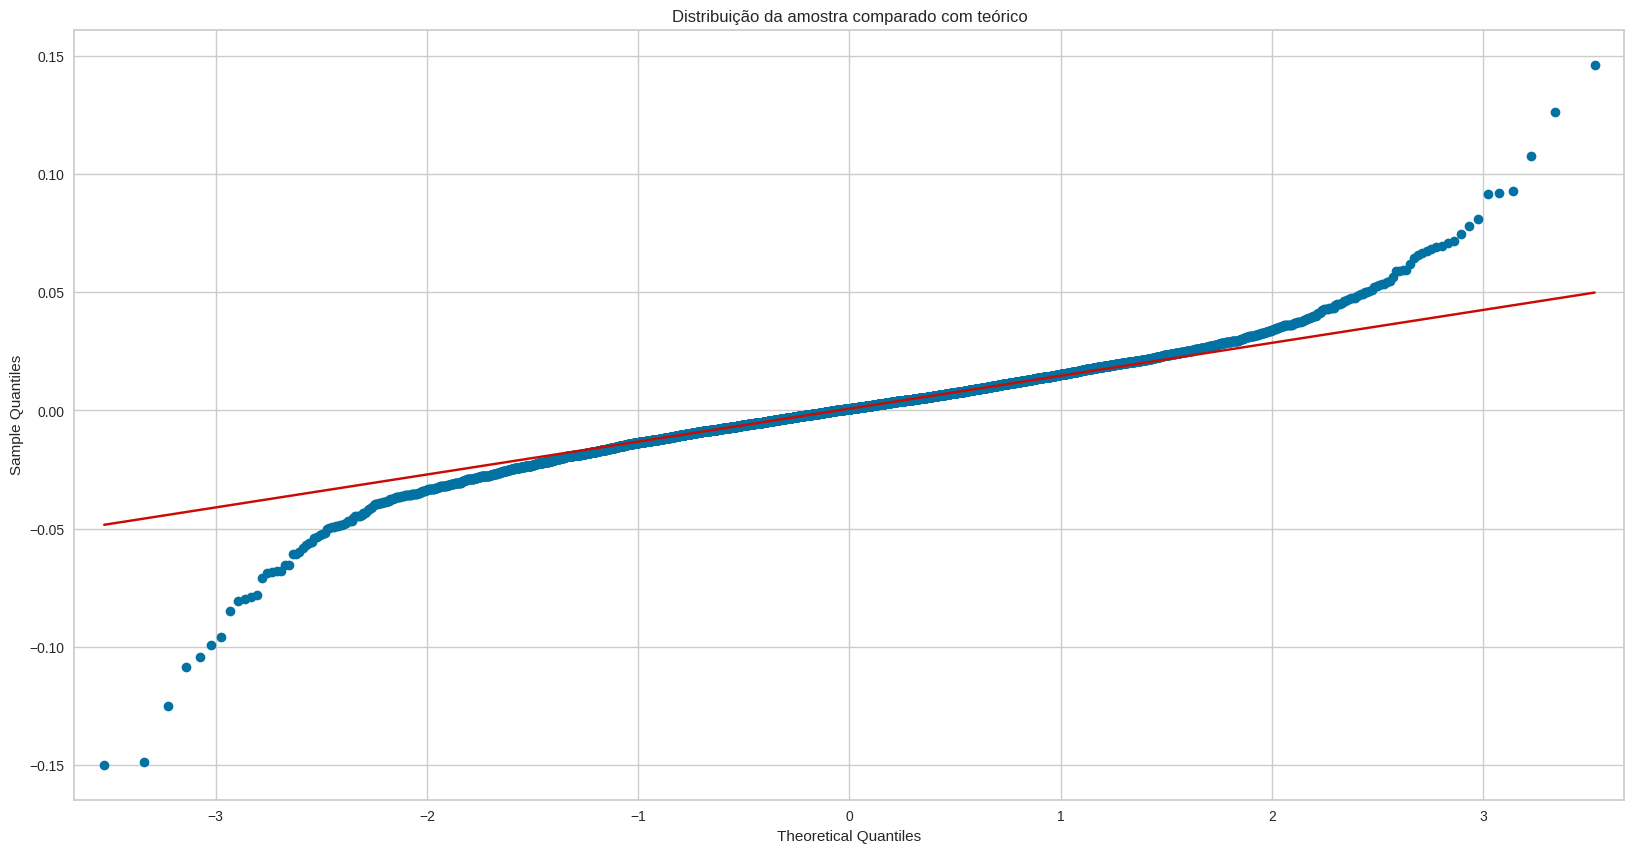

In [110]:
import statsmodels.api as sm

plt.figure(figsize=(8,4))
qq1 = sm.qqplot(df_ibov['return_percent'],
                line = 'q')
plt.title('Distribuição da amostra comparado com teórico')

In [111]:
adfuller_df_ibov = adfuller(df_ibov['return_percent'])
print('ADF Statistics IBOV:', adfuller_df_ibov[0])
print('p-value IBOV:', adfuller_df_ibov[1])

ADF Statistics IBOV: -16.55386119859642
p-value IBOV: 1.9342154219522025e-29


In [112]:
from scipy import stats
print('Dataset, retorno PERCENTUAL (1º dif.):', stats.shapiro(df_ibov['return_percent']))

Dataset, retorno PERCENTUAL (1º dif.): ShapiroResult(statistic=0.9409050941467285, pvalue=5.273520523778227e-40)


In [113]:
df_ibov.head()

,Price,media_movel,return_percent
Date,,,
17/05/2004,18.266,19.724980,-0.028869
18/05/2004,18.714,19.750715,0.024526
19/05/2004,18.877,19.779215,0.008710
20/05/2004,18.342,19.805975,-0.028341
21/05/2004,18.295,19.831945,-0.002562


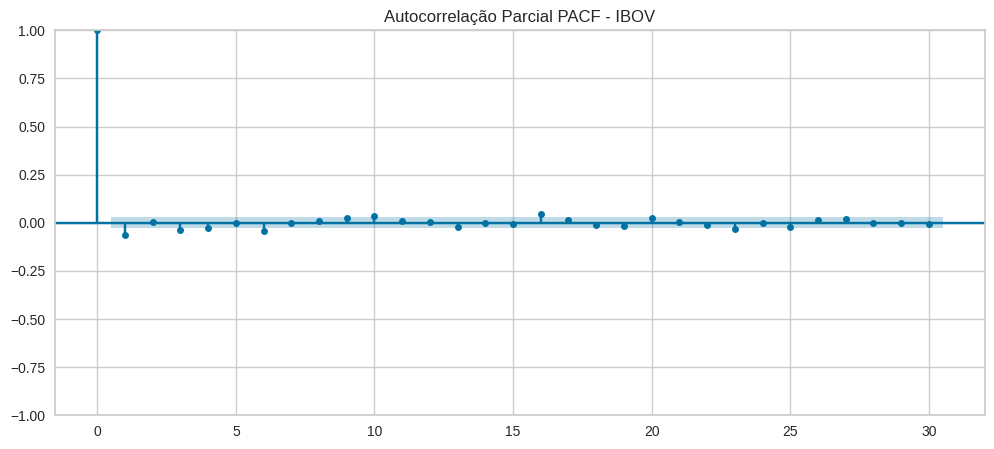

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(df_ibov['return_percent'].dropna(), lags = 30, ax=ax)
ax.set_title('Autocorrelação Parcial PACF - IBOV')
plt.show()

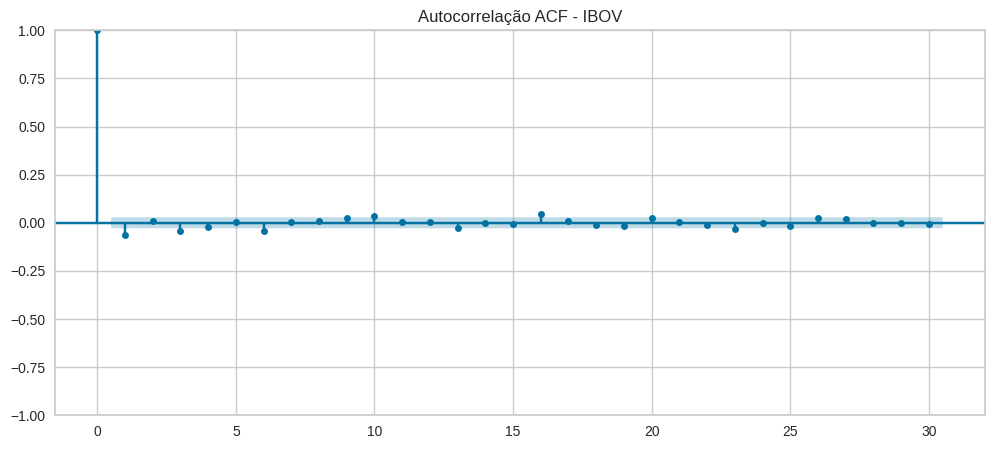

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(df_ibov['return_percent'].dropna(), lags = 30, ax=ax)
ax.set_title('Autocorrelação ACF - IBOV')
plt.show()

In [116]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [117]:
model = sm.tsa.arima.ARIMA(df_ibov['Price'], order=(1,1,2))
model_fit = model.fit()
result = model.fit()

<Axes: xlabel='return_percent', ylabel='Density'>

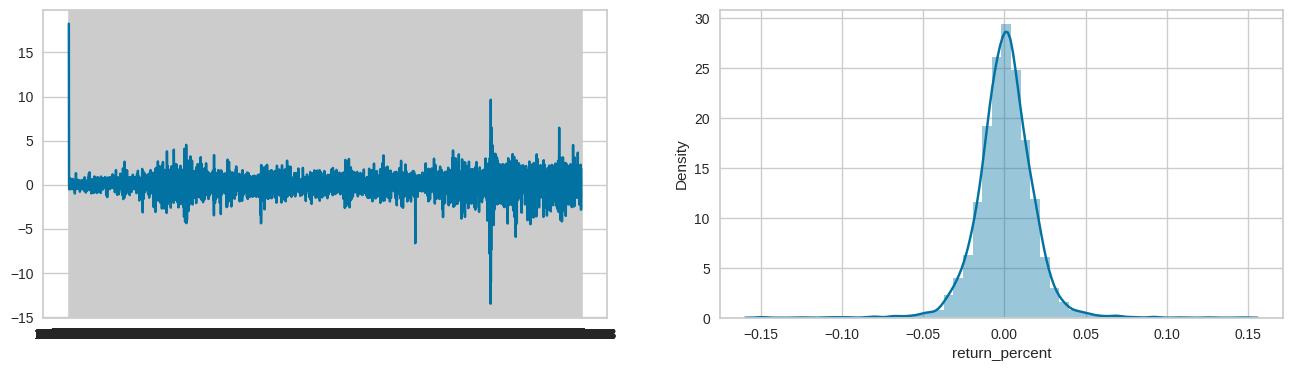

In [118]:
residuals = pd.DataFrame(model_fit.resid)

fig, (ax1, ax2) = plt.subplots( 1, 2, figsize = (16, 4))

ax1.plot(residuals)
sns.distplot(df_ibov['return_percent'],
                   kde=True,
                   ax=ax2)

In [ ]:
# Não deu tempo de terminar ):

# **Conclusão**

Em conclusão, a criação de modelos preditivos de Machine Learning para prever o comportamento do IBOVESPA é um desafio complexo que envolve diversas dificuldades, desde a coleta e processamento dos dados até a seleção do modelo adequado.

Após uma análise aprofundada, escolhemos o modelo Pycaret devido às suas facilidades oferecidas para a construção de modelos de Machine Learning. No entanto, é importante ressaltar que mesmo com um modelo de alta qualidade, a previsão do comportamento do mercado de ações, como o IBOVESPA, permanece um desafio significativo. A natureza volátil e imprevisível do mercado financeiro muitas vezes torna as previsões de longo prazo ineficazes e, em alguns casos, até mesmo arriscadas.

Nesse contexto, é importante reconhecer que a confiabilidade das previsões em relação ao mercado de ações é limitada. Em vez de tentar prever os valores exatos do IBOVESPA, talvez seja mais sensato direcionar esforços para criar modelos que possam prever o movimento geral do mercado, ou seja, se ele está propenso a subir ou cair em um determinado período de tempo. Essas previsões podem ser mais confiáveis e úteis para os investidores, permitindo-lhes tomar decisões informadas com base nas tendências gerais do mercado.




